In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd

In [2]:
class GMM():
    def __init__(self, k, dim, init_mu=None, init_sigma=None, init_pi=None, colors=None):
        self.k = k
        self.dim = dim
        if(init_mu is None):
            init_mu = random.rand(k, dim)*20 - 10
        self.mu = init_mu
        if(init_sigma is None):
            init_sigma = np.zeros((k, dim, dim))
            for i in range(k):
                init_sigma[i] = np.eye(dim)
        self.sigma = init_sigma
        if(init_pi is None):
            init_pi = np.ones(self.k)/self.k
        self.pi = init_pi
        if(colors is None):
            colors = random.rand(k, 3)
        self.colors = colors
    
    def init_em(self, X):
        self.data = X
        self.num_points = X.shape[0]
        self.z = np.zeros((self.num_points, self.k))
    
    def e_step(self):
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mu[i], cov=self.sigma[i])
        self.z /= self.z.sum(axis=1, keepdims=True)
    
    def m_step(self):
        sum_z = self.z.sum(axis=0)
        self.pi = sum_z / self.num_points
        self.mu = np.matmul(self.z.T, self.data)
        self.mu /= sum_z[:, None]
        for i in range(self.k):
            j = np.expand_dims(self.data, axis=1) - self.mu[i]
            s = np.matmul(j.transpose([0, 2, 1]), j)
            self.sigma[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
            self.sigma[i] /= sum_z[i]
            
    def log_likelihood(self, X):
        ll = []
        for d in X:
            tot = 0
            for i in range(self.k):
                tot += self.pi[i] * multivariate_normal.pdf(d, mean=self.mu[i], cov=self.sigma[i])
            ll.append(np.log(tot))
        return np.sum(ll)
    
    def plot_gaussian(self, mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):
        pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0),
            width=ell_radius_x * 2,
            height=ell_radius_y * 2,
            facecolor=facecolor,
            **kwargs)
        scale_x = np.sqrt(cov[0, 0]) * n_std
        mean_x = mean[0]
        scale_y = np.sqrt(cov[1, 1]) * n_std
        mean_y = mean[1]
        transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale_x, scale_y) \
            .translate(mean_x, mean_y)
        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

    def draw(self, ax, n_std=2.0, facecolor='none', **kwargs):
        if(self.dim != 2):
            print("Drawing available only for 2D model")
            return
        for i in range(self.k):
            self.plot_gaussian(self.mu[i], self.sigma[i], ax, n_std=n_std, edgecolor=self.colors[i], **kwargs)

def plot(title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(X[:, 0], X[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((np.min(X[:, 0])-0.02, np.max(X[:, 0])+0.02))
    ax.set_ylim((np.min(X[:, 1])-2, np.max(X[:, 1])+2))
    plt.title(title)
    plt.savefig(title.replace(':', '_'))
    plt.show()
    plt.clf()

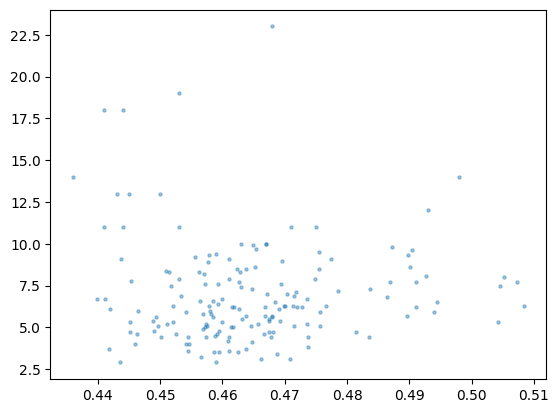

In [3]:
# input data files
data=pd.read_csv('EM_Neeraj.csv')
X=np.array(data[['Age(Ga)','2_Err']])
fig = plt.figure()
ax = fig.gca()
ax.scatter(X[:,0], X[:,1], s=5, alpha=0.4)
ax.autoscale(enable=True)


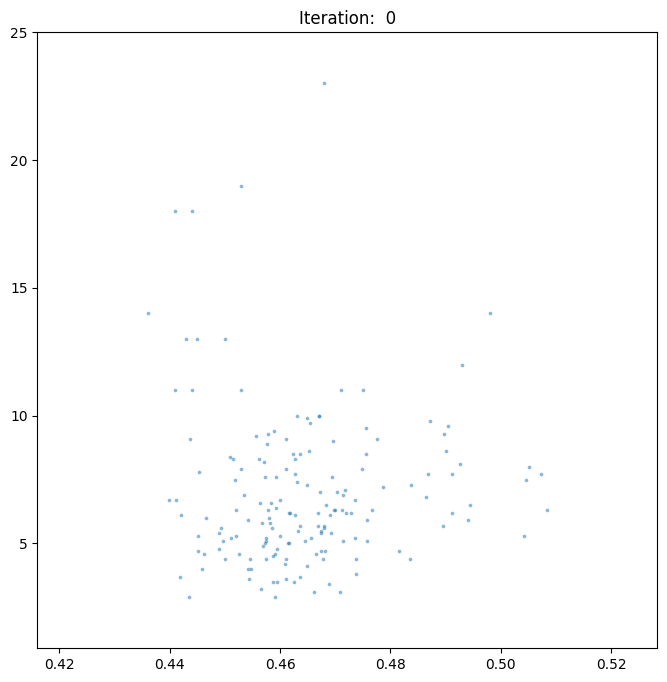

Iteration: 1, log-likelihood: 66.5131


<Figure size 640x480 with 0 Axes>

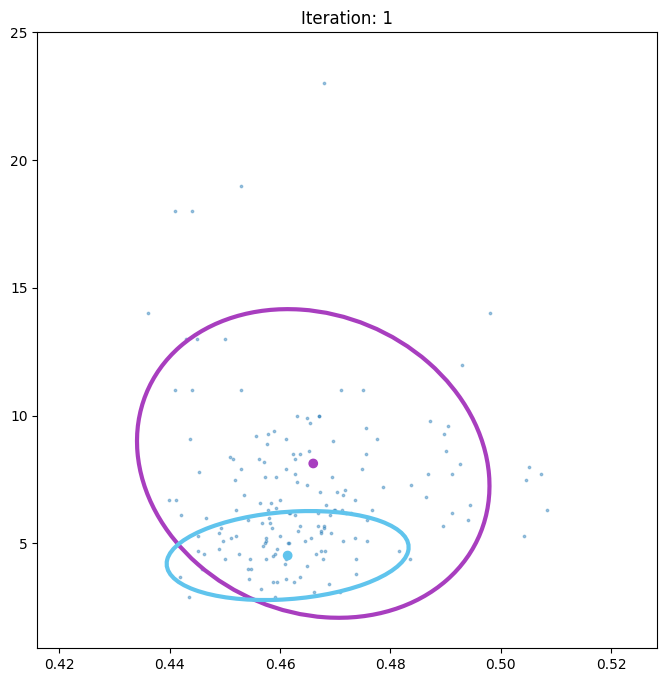

Iteration: 2, log-likelihood: 74.7633


<Figure size 640x480 with 0 Axes>

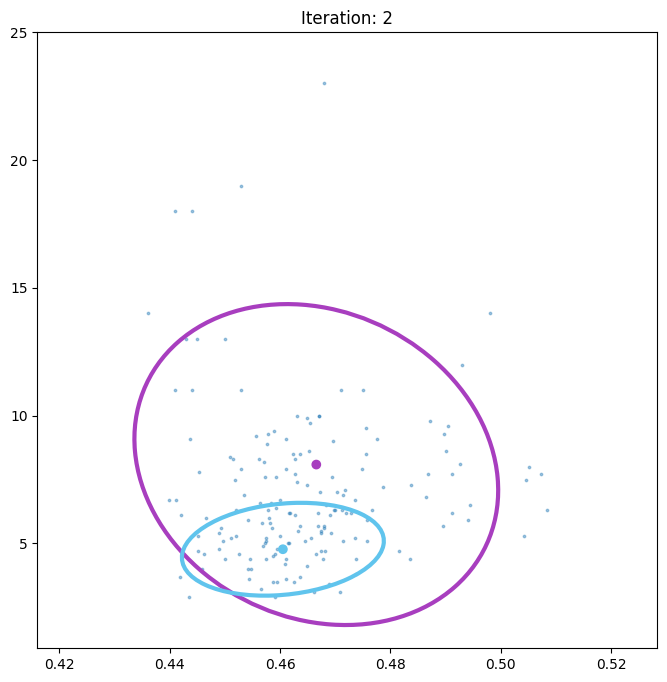

Iteration: 3, log-likelihood: 78.6104


<Figure size 640x480 with 0 Axes>

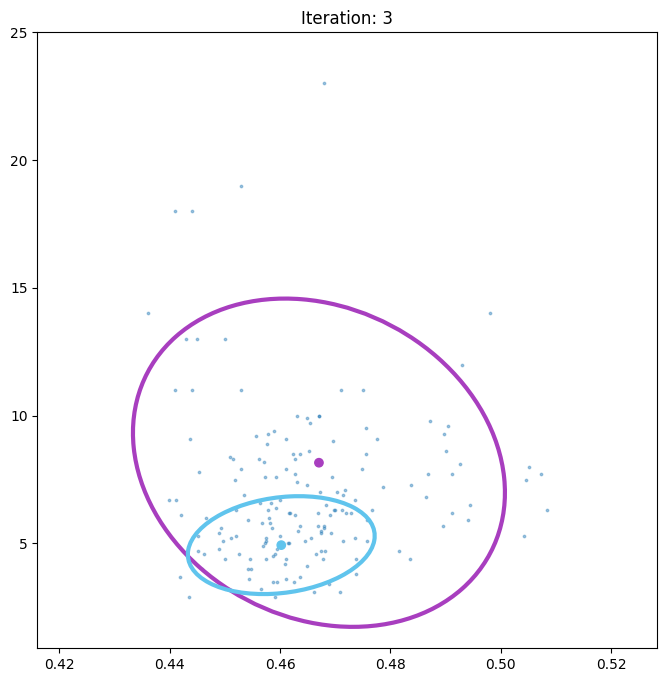

Iteration: 4, log-likelihood: 80.7160


<Figure size 640x480 with 0 Axes>

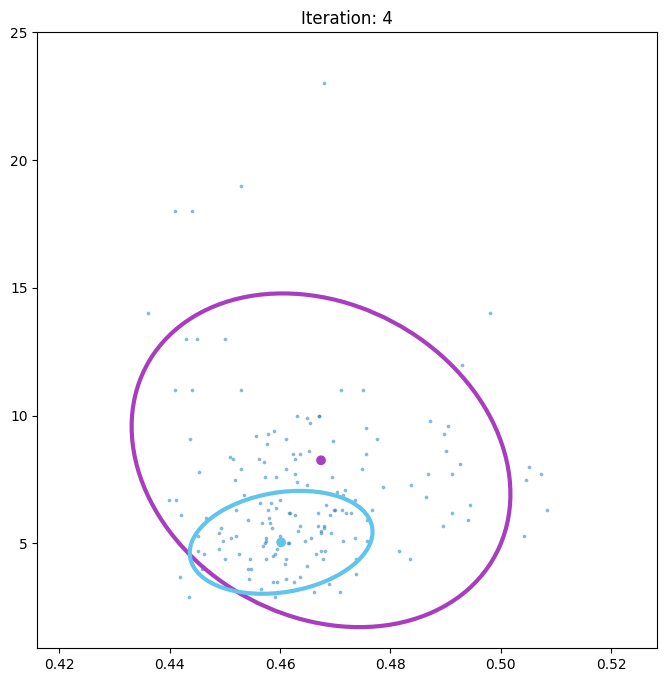

Iteration: 5, log-likelihood: 82.0776


<Figure size 640x480 with 0 Axes>

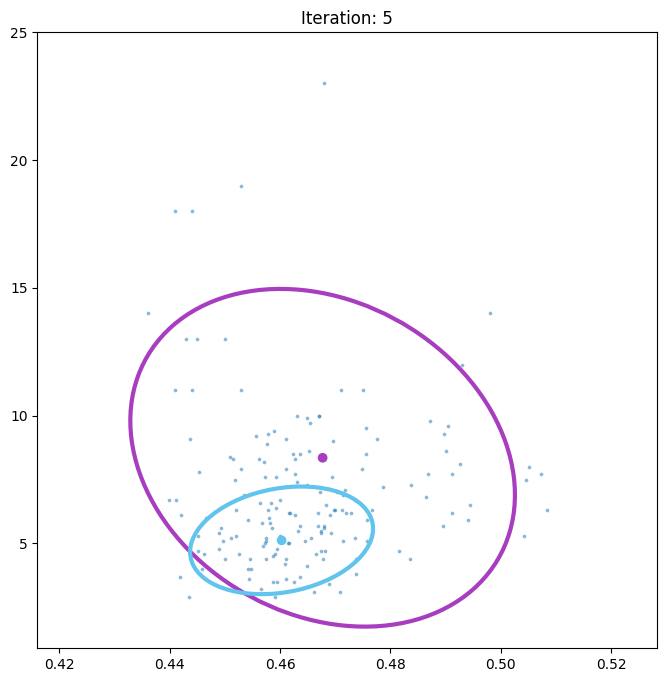

Iteration: 6, log-likelihood: 83.0745


<Figure size 640x480 with 0 Axes>

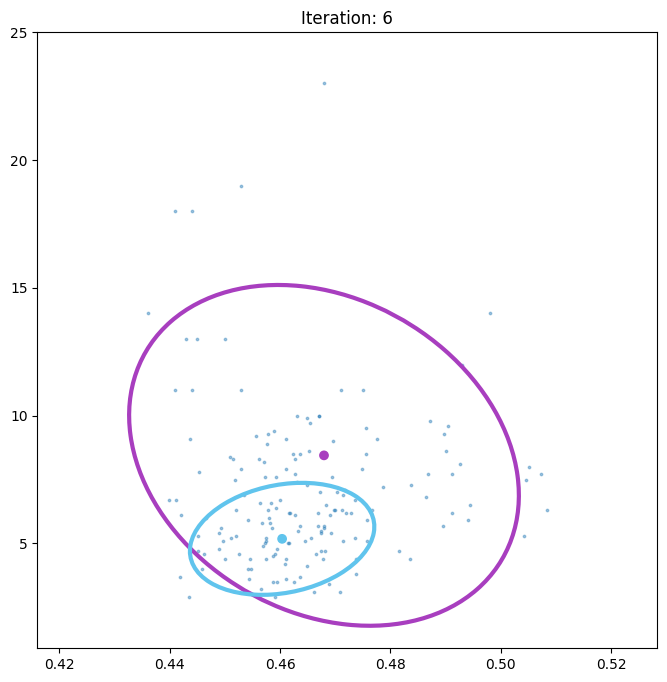

Iteration: 7, log-likelihood: 83.8721


<Figure size 640x480 with 0 Axes>

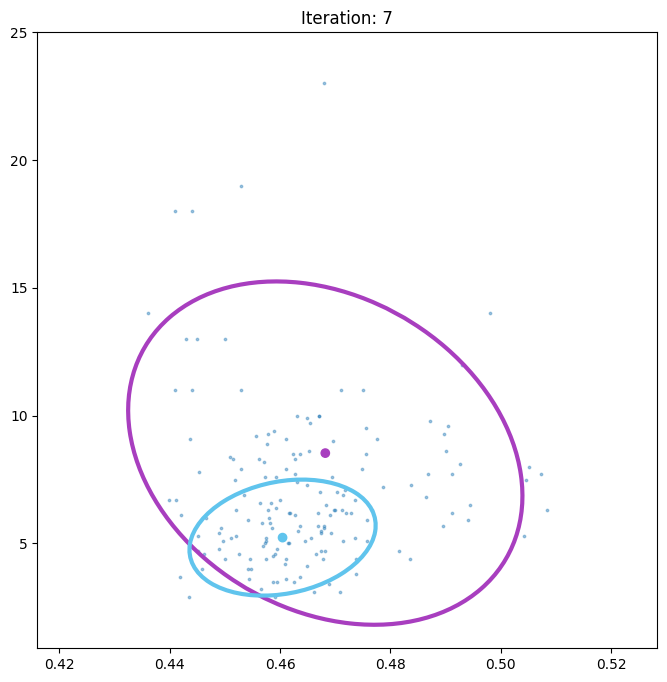

Iteration: 8, log-likelihood: 84.5572


<Figure size 640x480 with 0 Axes>

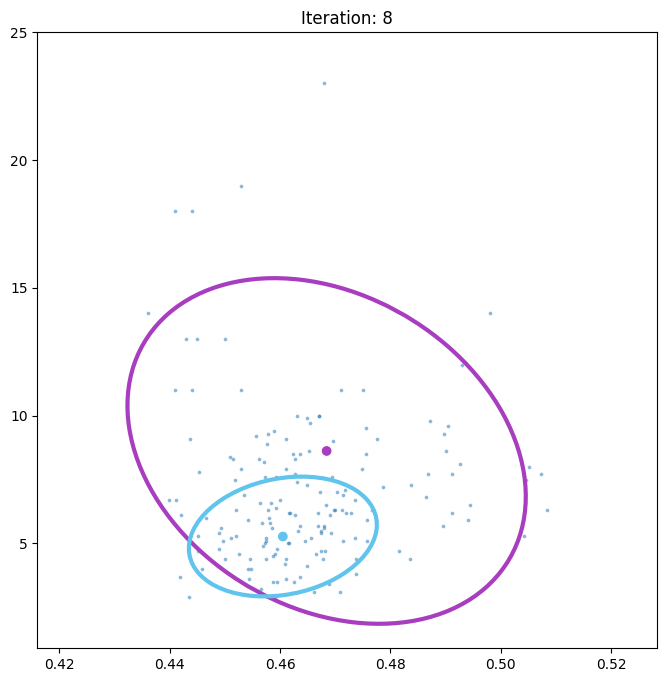

Iteration: 9, log-likelihood: 85.1778


<Figure size 640x480 with 0 Axes>

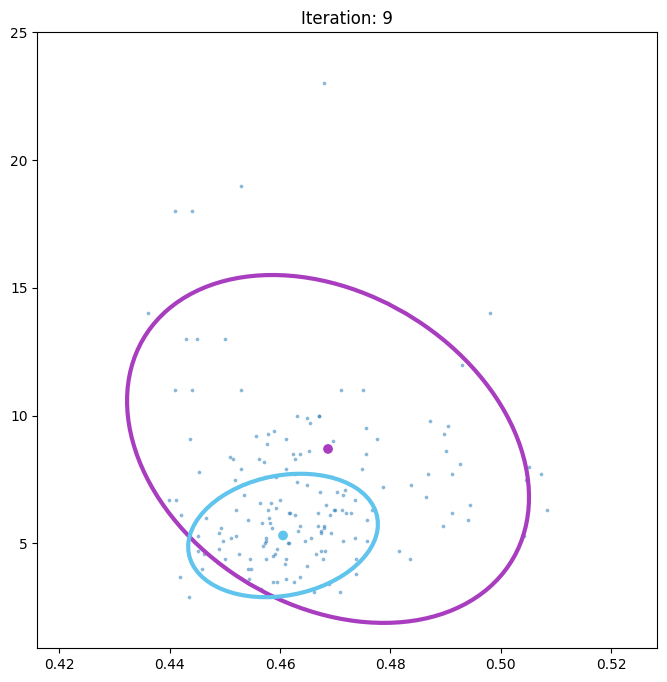

Iteration: 10, log-likelihood: 85.7603


<Figure size 640x480 with 0 Axes>

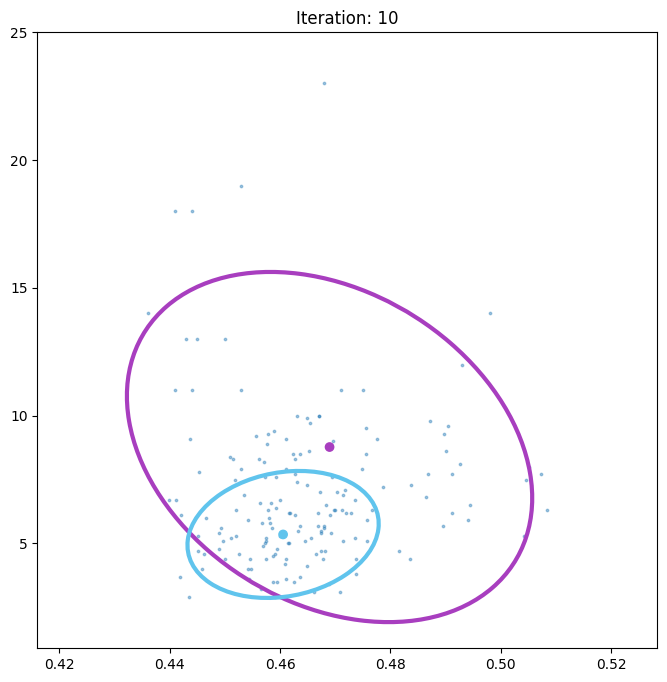

Iteration: 11, log-likelihood: 86.3169


<Figure size 640x480 with 0 Axes>

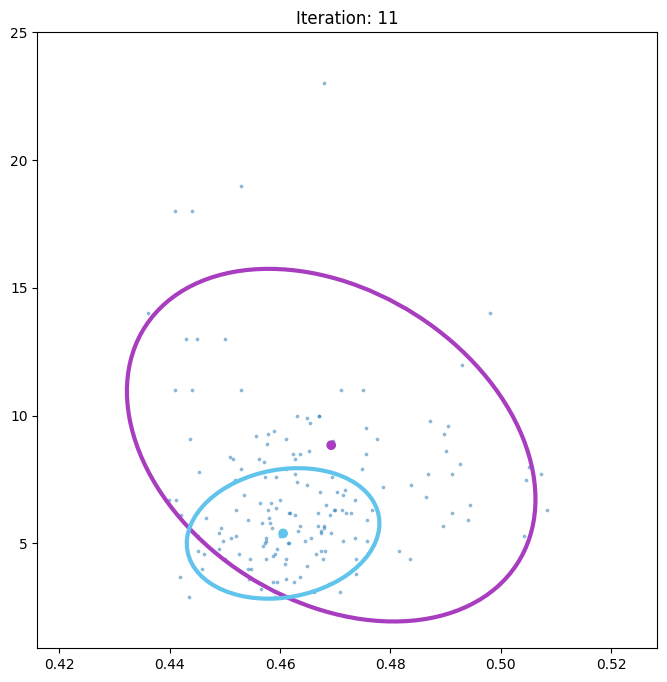

Iteration: 12, log-likelihood: 86.8506


<Figure size 640x480 with 0 Axes>

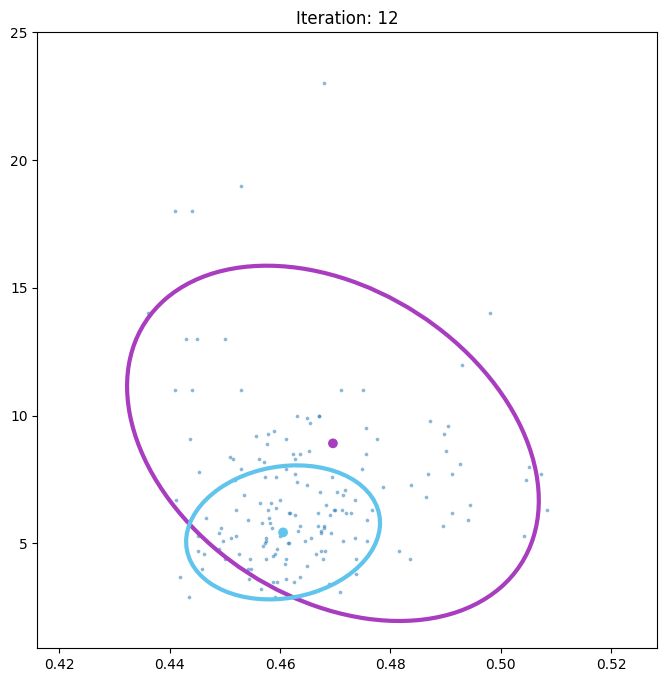

Iteration: 13, log-likelihood: 87.3583


<Figure size 640x480 with 0 Axes>

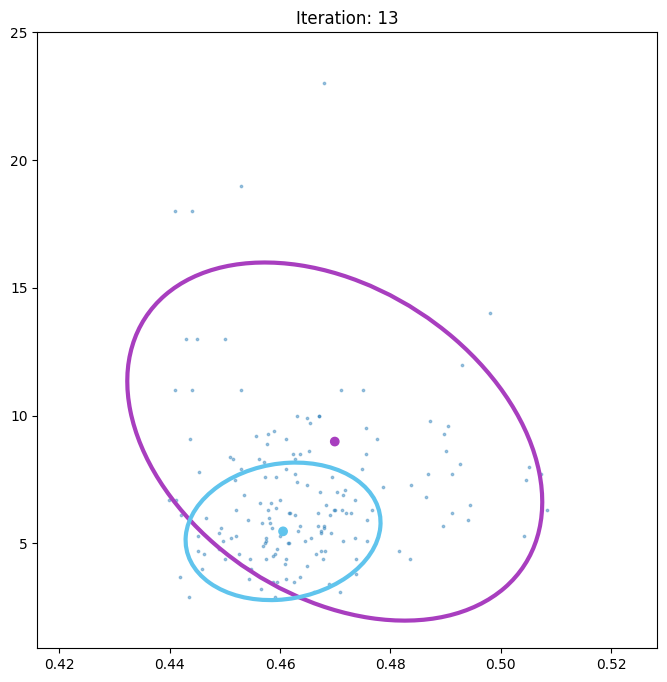

Iteration: 14, log-likelihood: 87.8338


<Figure size 640x480 with 0 Axes>

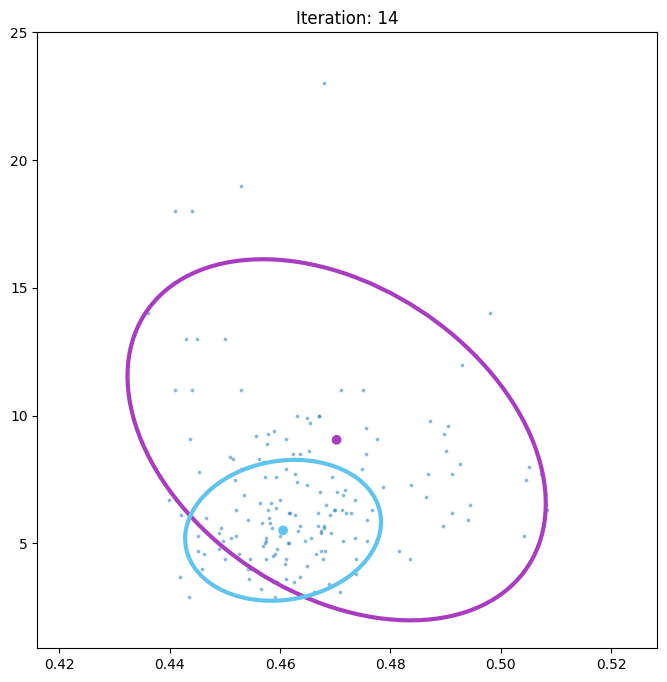

Iteration: 15, log-likelihood: 88.2702


<Figure size 640x480 with 0 Axes>

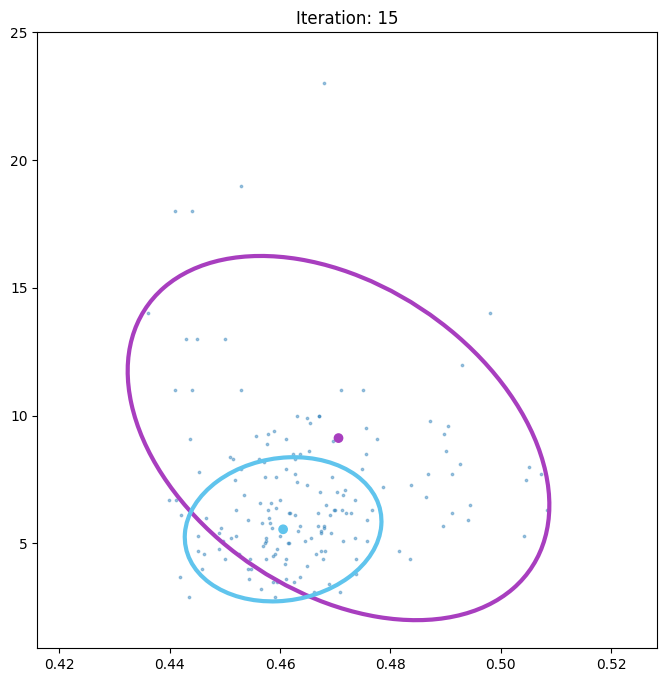

Iteration: 16, log-likelihood: 88.6617


<Figure size 640x480 with 0 Axes>

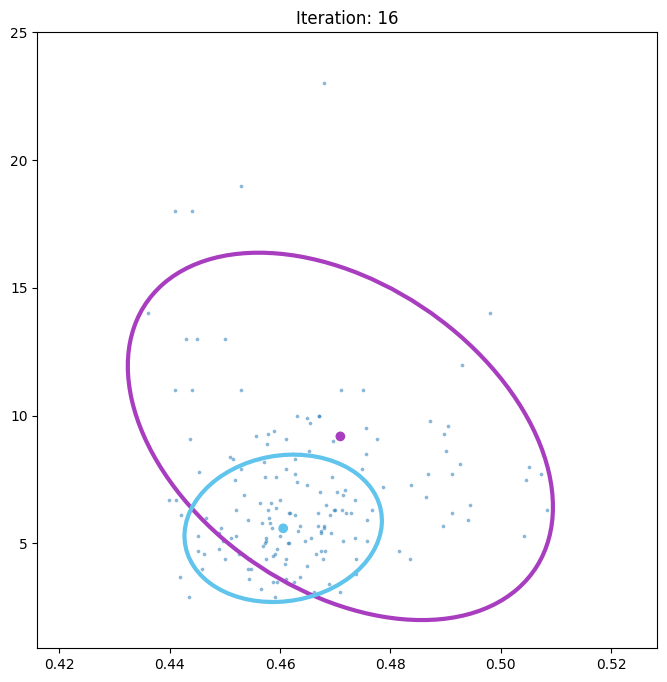

Iteration: 17, log-likelihood: 89.0048


<Figure size 640x480 with 0 Axes>

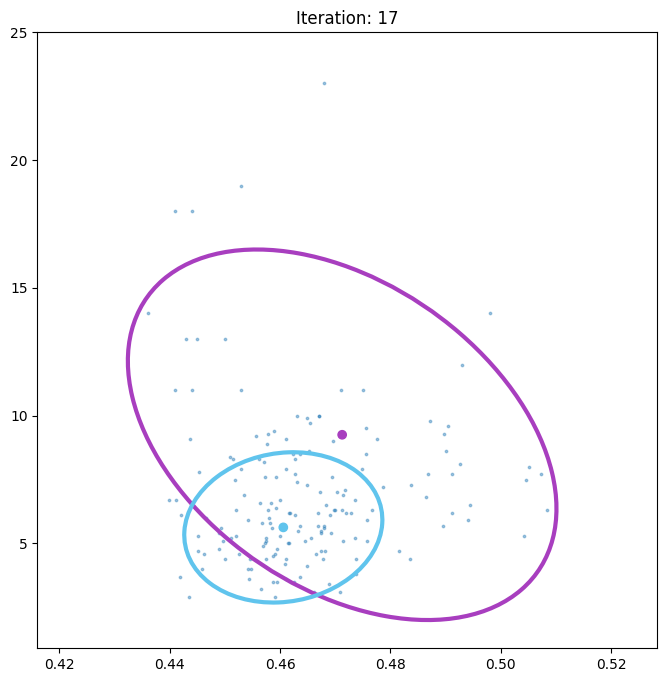

Iteration: 18, log-likelihood: 89.2985


<Figure size 640x480 with 0 Axes>

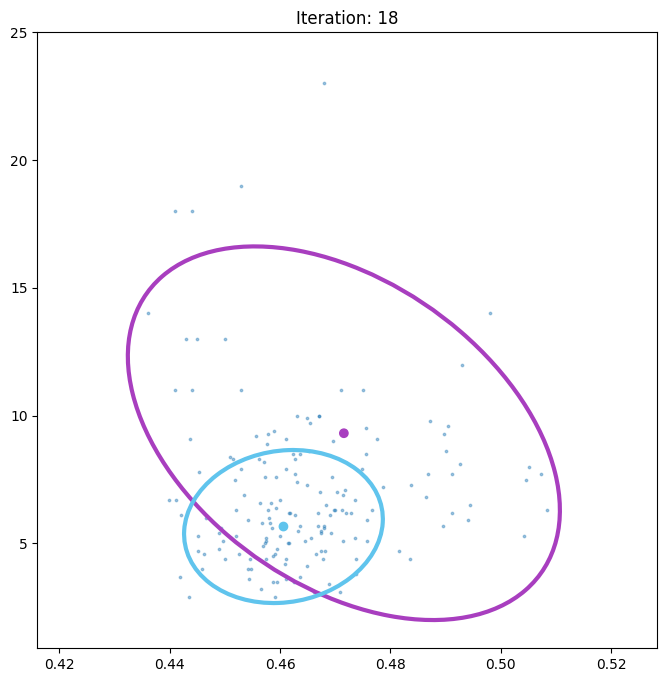

Iteration: 19, log-likelihood: 89.5441


<Figure size 640x480 with 0 Axes>

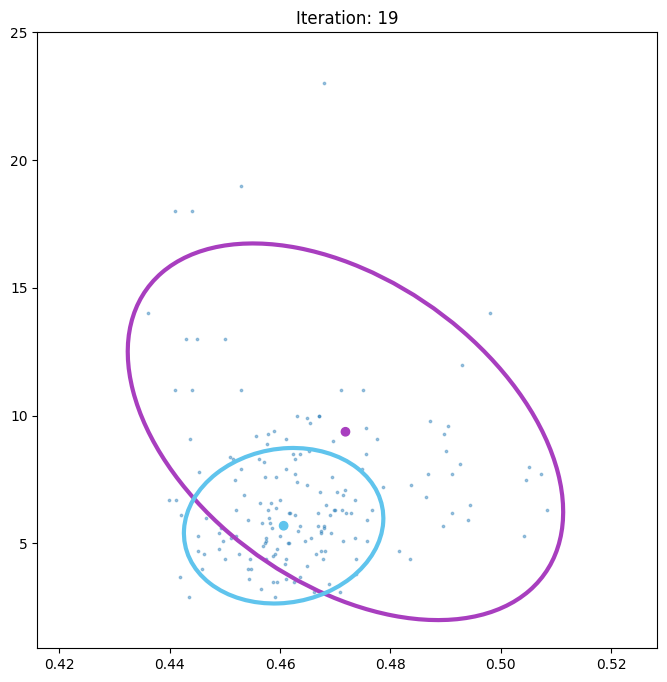

Iteration: 20, log-likelihood: 89.7451


<Figure size 640x480 with 0 Axes>

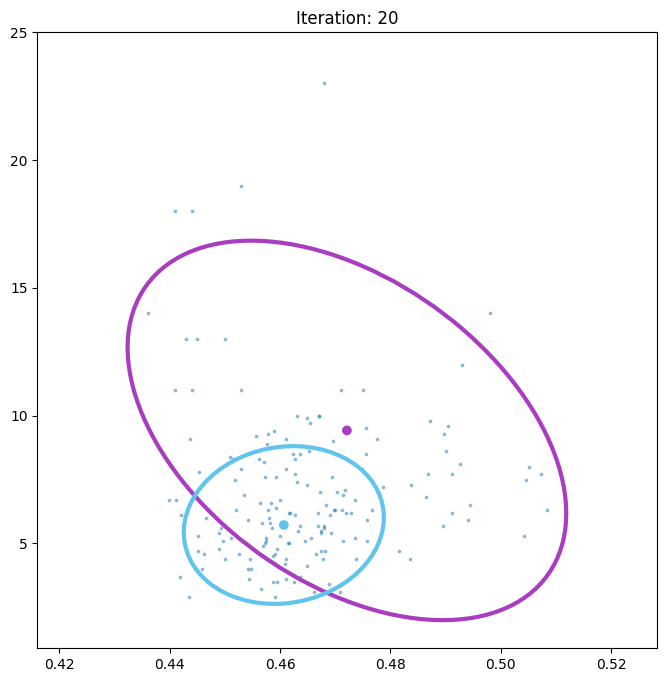

Iteration: 21, log-likelihood: 89.9061


<Figure size 640x480 with 0 Axes>

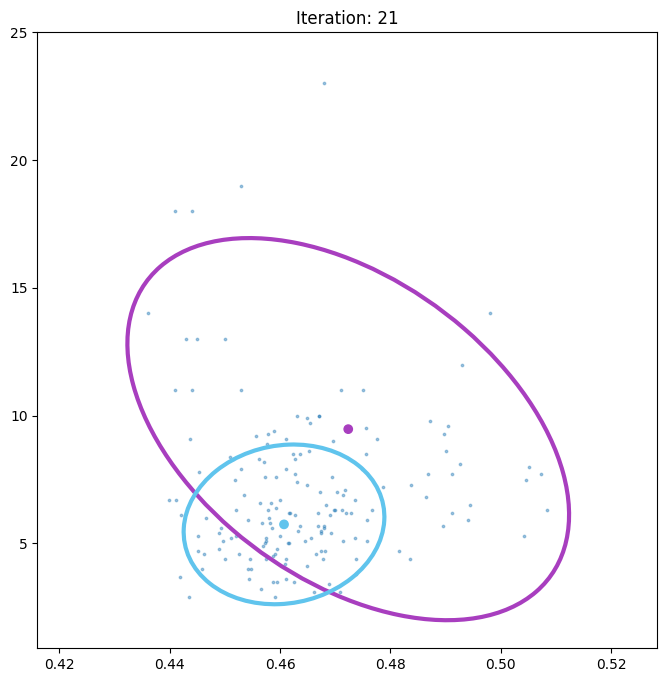

Iteration: 22, log-likelihood: 90.0328


<Figure size 640x480 with 0 Axes>

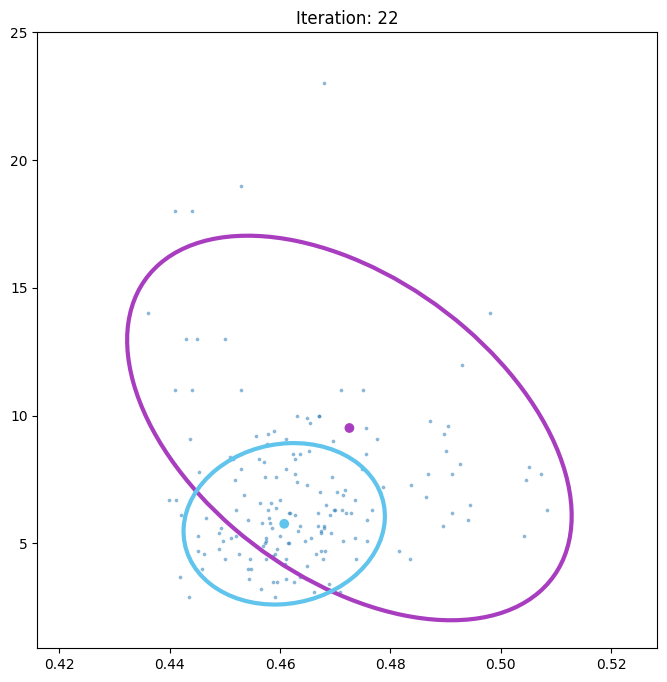

Iteration: 23, log-likelihood: 90.1307


<Figure size 640x480 with 0 Axes>

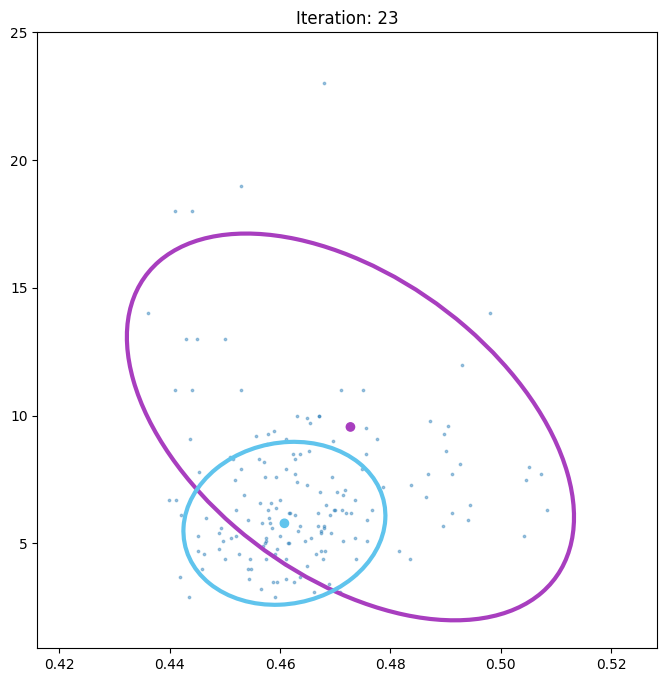

Iteration: 24, log-likelihood: 90.2053


<Figure size 640x480 with 0 Axes>

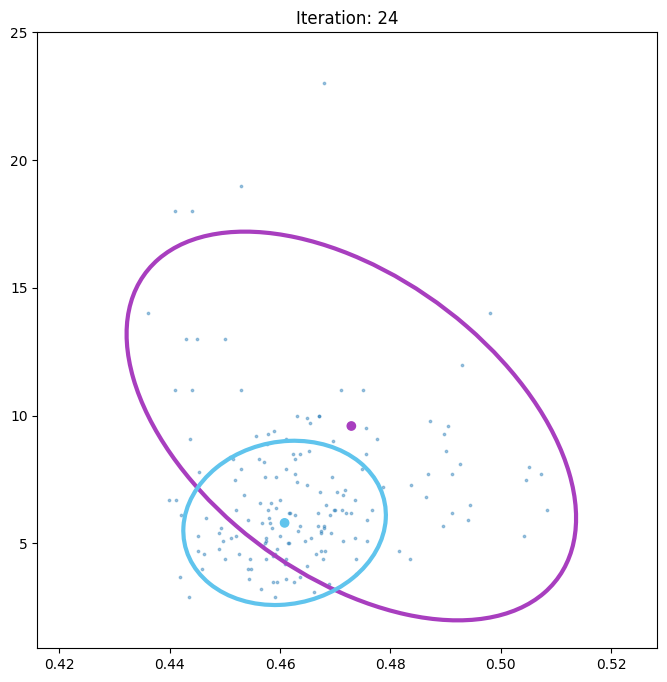

Iteration: 25, log-likelihood: 90.2613


<Figure size 640x480 with 0 Axes>

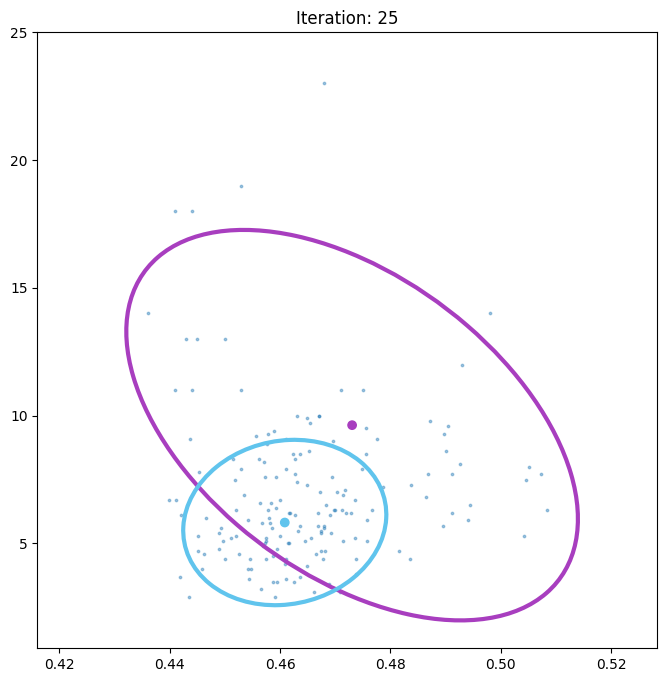

Iteration: 26, log-likelihood: 90.3031


<Figure size 640x480 with 0 Axes>

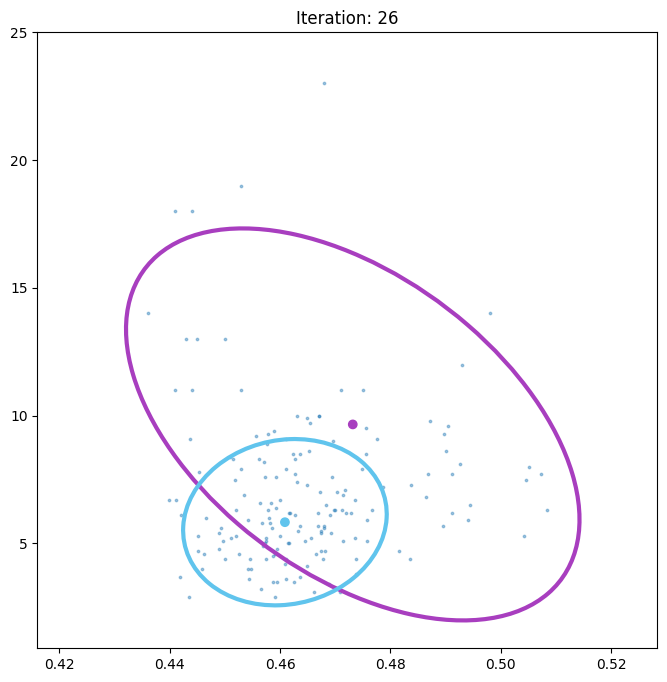

Iteration: 27, log-likelihood: 90.3339


<Figure size 640x480 with 0 Axes>

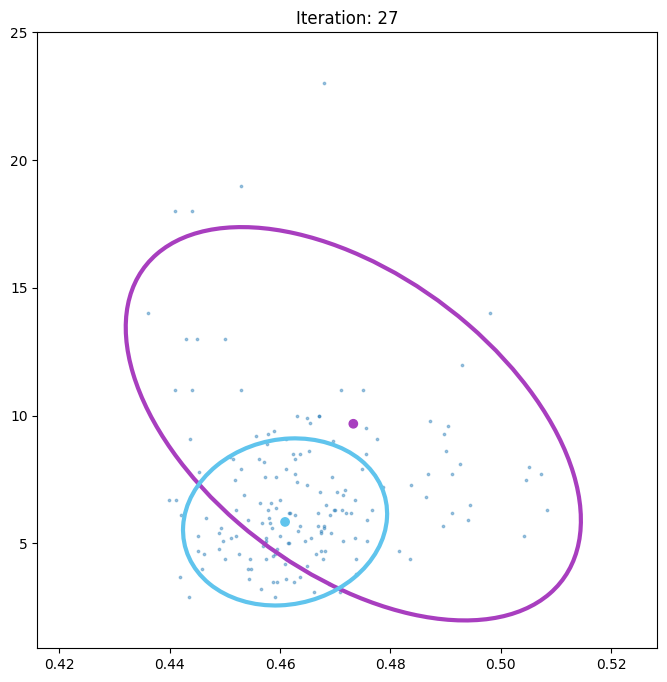

Iteration: 28, log-likelihood: 90.3564


<Figure size 640x480 with 0 Axes>

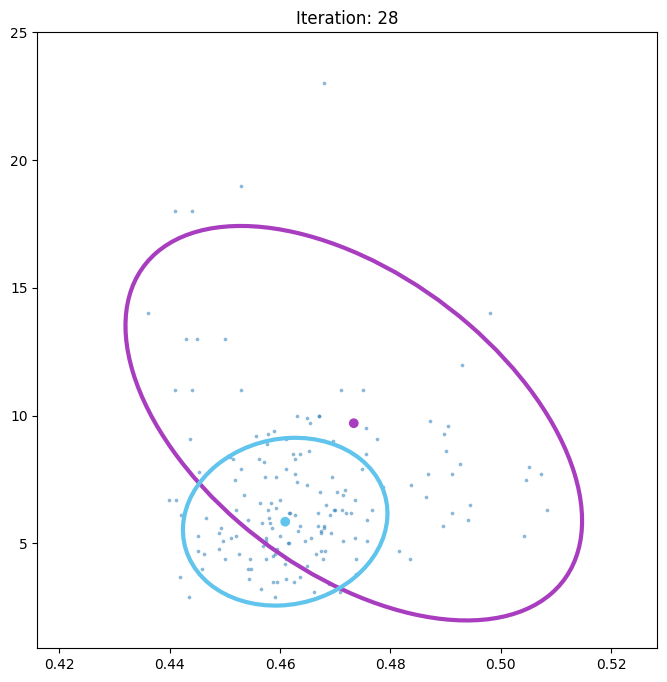

Iteration: 29, log-likelihood: 90.3728


<Figure size 640x480 with 0 Axes>

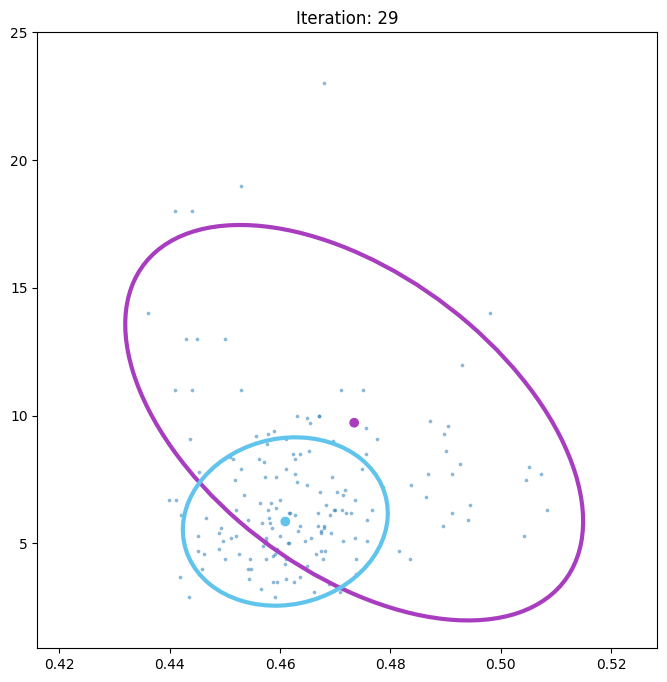

Iteration: 30, log-likelihood: 90.3846


<Figure size 640x480 with 0 Axes>

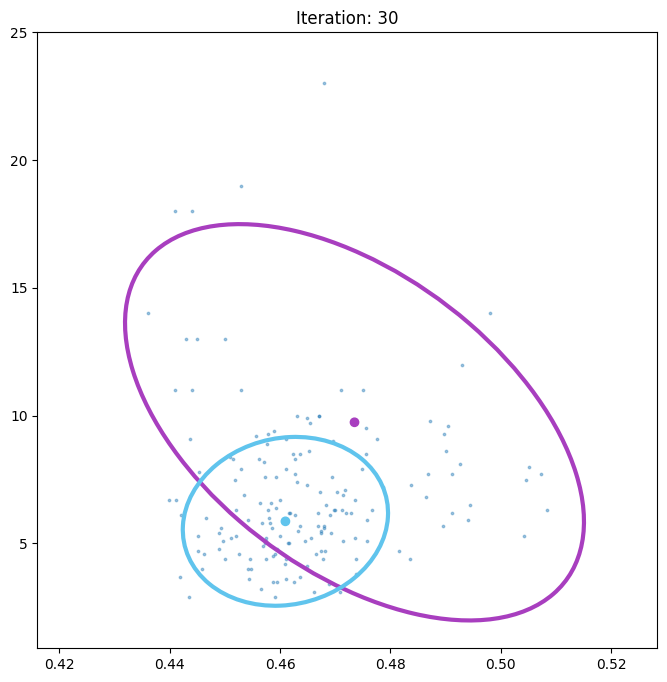

<Figure size 640x480 with 0 Axes>

In [4]:
# enter the number of gaussian cluaster 
clst=2
dimn=X.shape[1]
gmm = GMM(clst,dimn)
gmm.init_em(X)
# enter the number of iteration
num_iters = 30
log_likelihood = [gmm.log_likelihood(X)]
plot("Iteration:  0")
for e in range(num_iters):
    gmm.e_step()
    gmm.m_step()
    log_likelihood.append(gmm.log_likelihood(X))
    print("Iteration: {}, log-likelihood: {:.4f}".format(e+1, log_likelihood[-1]))
    plot(title="Iteration: " + str(e+1))

Text(0.5, 1.0, 'likelihood Convergence ')

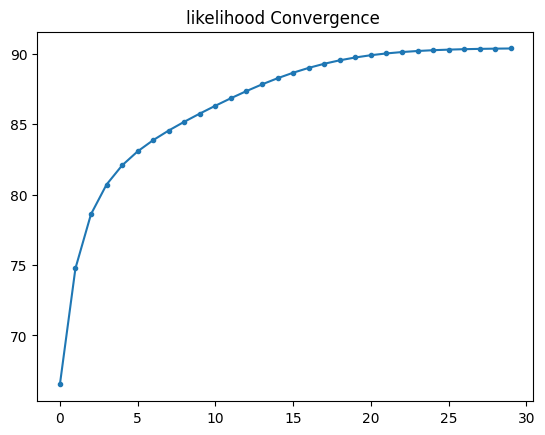

In [8]:
#ploting the likelihood 
plt.plot(log_likelihood[1:], marker='.')
plt.title("likelihood Convergence ")